Exp 5: K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import networkx as nx

In [2]:
data= pd.read_csv('Iris.csv')

In [3]:
# Drop the 'Id' and 'Species' columns for clustering
X = data.drop(columns=["Id", "Species"])

In [4]:
# Encode the true species labels
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(data["Species"])

In [5]:
# Train the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [6]:
# Get the predicted cluster labels
predicted_labels = kmeans.labels_

# Map each predicted cluster label to the most frequent true label in that cluster
label_mapping = {}
for i in range(3):
    mask = predicted_labels == i
    # Ensure mode() returns the most frequent label without errors
    mapped_label = mode(true_labels[mask], keepdims=True)[0][
        0
    ]  # Using keepdims to avoid scalar indexing issues
    label_mapping[i] = mapped_label

# Apply the mapping to the predicted labels
mapped_labels = [label_mapping[label] for label in predicted_labels]

# Calculate accuracy
accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 88.67%


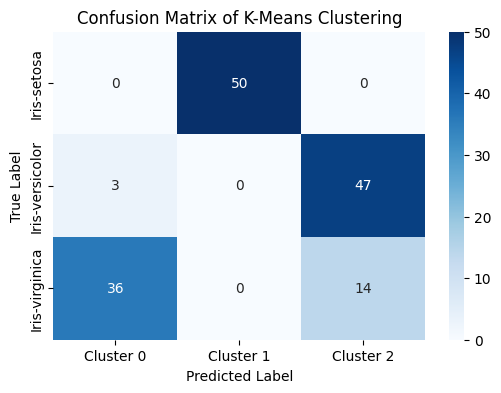

In [7]:
# Encode species to numerical values for comparison with clusters
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(data["Species"])

# Plot the confusion matrix
predicted_labels = kmeans.labels_
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=label_encoder.classes_,
)
plt.title("Confusion Matrix of K-Means Clustering")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

Hierarchial Clustering 

In [8]:
from sklearn.cluster import AgglomerativeClustering

# Train the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=3)
predicted_labels = agg_cluster.fit_predict(X)

In [9]:
# Map each predicted cluster label to the most frequent true label in that cluster
label_mapping = {}
for i in range(3):
    mask = predicted_labels == i
    mapped_label = mode(true_labels[mask], keepdims=True)[0][
        0
    ]  # Ensure correct mode access
    label_mapping[i] = mapped_label

# Apply the mapping to the predicted labels
mapped_labels = [label_mapping[label] for label in predicted_labels]

# Calculate accuracy
accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 89.33%


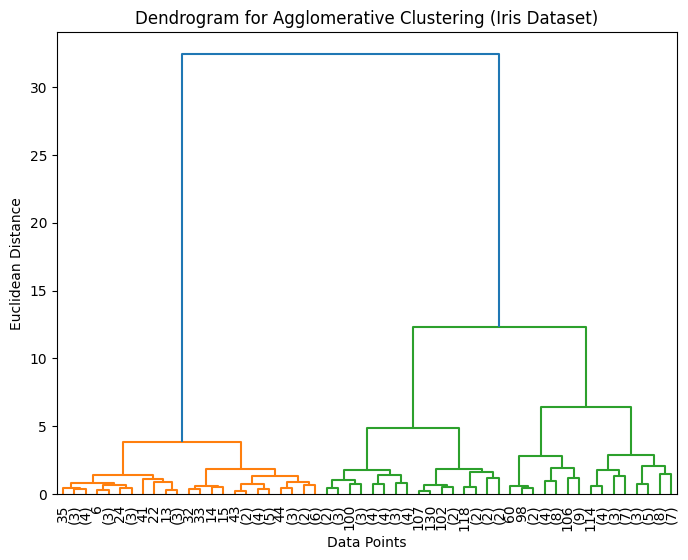

In [10]:
# Generate the linkage matrix (using 'ward' linkage like the sklearn model)
Z = linkage(X, method="ward")

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(
    Z,
    truncate_mode="level",
    p=5,  # Show top 5 levels of the hierarchy
    leaf_rotation=90,
    leaf_font_size=10,
)
plt.title("Dendrogram for Agglomerative Clustering (Iris Dataset)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

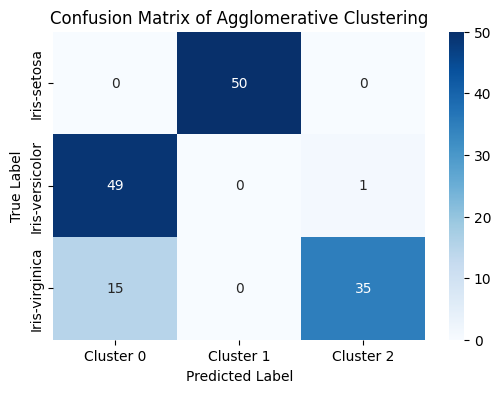

In [11]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=label_encoder.classes_,
)
plt.title("Confusion Matrix of Agglomerative Clustering")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

Divisive clustering

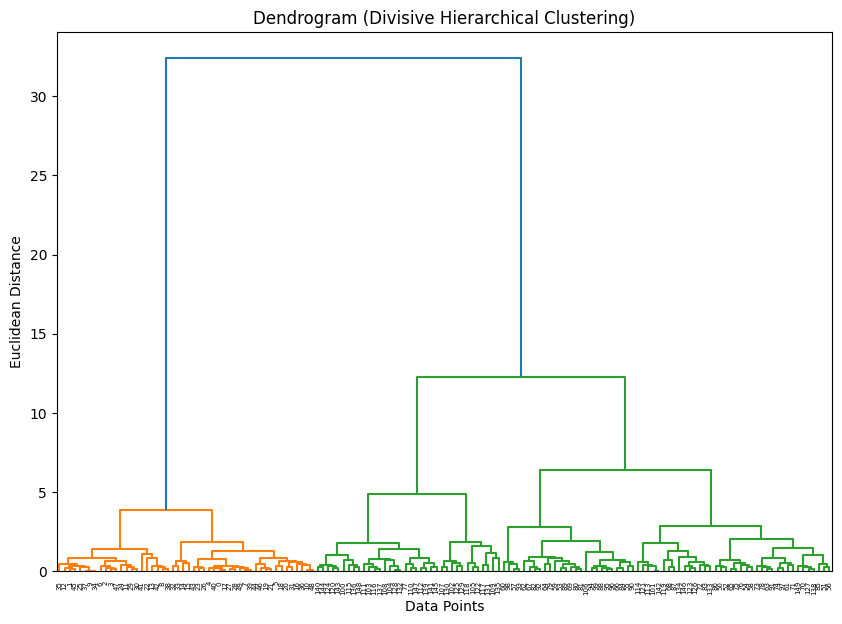

In [12]:
# Perform hierarchical clustering using 'ward' method (can mimic divisive approach)
Z = linkage(X, method="ward")

# Plot the dendrogram to visualize the hierarchy
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram (Divisive Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Cut the dendrogram at a certain level to create 3 clusters
predicted_labels = fcluster(Z, t=3, criterion="maxclust")

# Map each predicted cluster label to the most frequent true label in that cluster
label_mapping = {}
for i in range(1, 4):
    mask = predicted_labels == i
    mapped_label = mode(true_labels[mask], keepdims=True)[0][
        0
    ]  # Ensure correct mode access
    label_mapping[i] = mapped_label

# Apply the mapping to the predicted labels
mapped_labels = [label_mapping[label] for label in predicted_labels]


In [13]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 89.33%


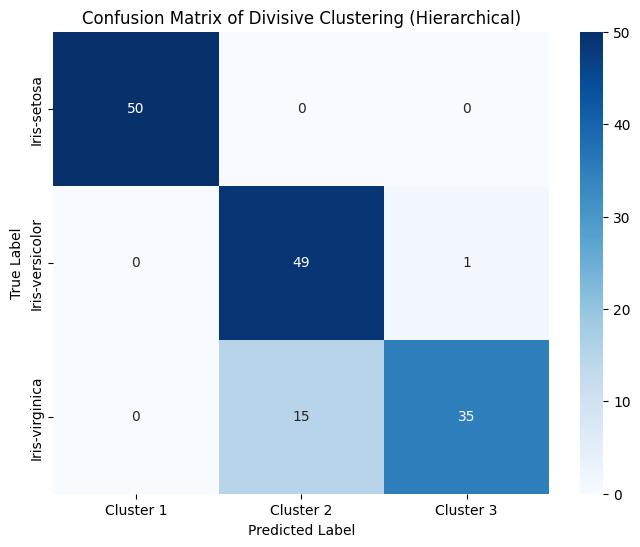

In [14]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, mapped_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Cluster 1", "Cluster 2", "Cluster 3"],
    yticklabels=label_encoder.classes_,
)
plt.title("Confusion Matrix of Divisive Clustering (Hierarchical)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

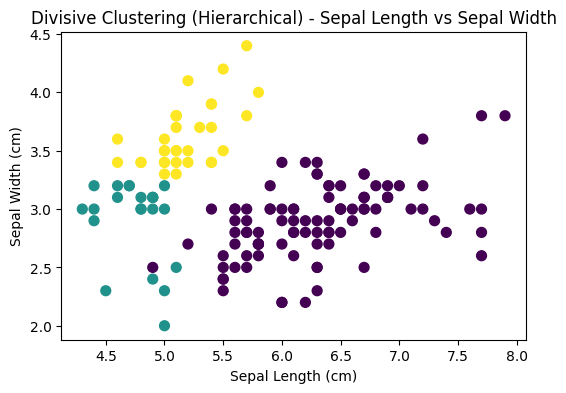

In [24]:
# Plot a 2D scatter plot (Divisive Clustering)
X_2D = data[["SepalLengthCm", "SepalWidthCm"]]  # You can change features if needed

plt.figure(figsize=(6, 4))
plt.scatter(X_2D.iloc[:, 0], X_2D.iloc[:, 1], c=predicted_labels, cmap="viridis", s=50)
plt.title("Divisive Clustering (Hierarchical) - Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

Exp 6 - Principal Component Analysis (PCA)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features for better PCA performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Train a K-Means model on the PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X_pca)

# Map predicted cluster labels to the most frequent true label in each cluster
label_mapping = {}
for i in range(3):
    mask = predicted_labels == i
    mapped_label = mode(true_labels[mask], keepdims=True)[0][0]
    label_mapping[i] = mapped_label

# Apply the mapping to predicted labels
mapped_labels = [label_mapping[label] for label in predicted_labels]

# Calculate accuracy
accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 66.67%


c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


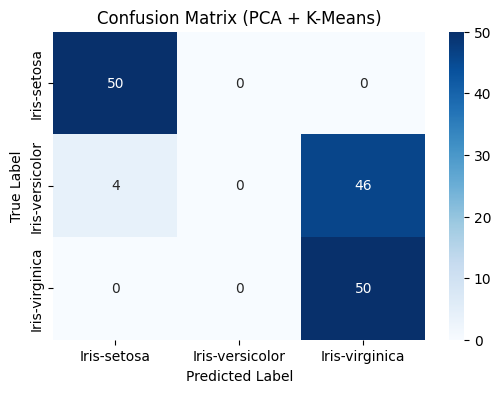

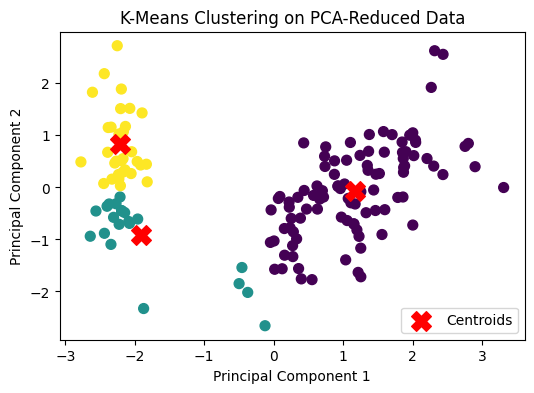

In [17]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, mapped_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.title("Confusion Matrix (PCA + K-Means)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Plot the clusters in 2D using the first two principal components
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap="viridis", s=50)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red",
    s=200,
    marker="X",
    label="Centroids",
)
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

EXp 7 - Hidden Markov Model

In [18]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from hmmlearn.hmm import GaussianHMM

In [20]:
# Train the Gaussian HMM with 3 hidden states (as we have 3 species)
hmm = GaussianHMM(n_components=3, covariance_type="full", n_iter=100, random_state=42)
hmm.fit(X_scaled)

# Predict the hidden states for each observation
predicted_states = hmm.predict(X_scaled)

# Map each hidden state to the most frequent true label in that state
label_mapping = {}
for i in range(3):
    mask = predicted_states == i
    mapped_label = mode(true_labels[mask], keepdims=True)[0][0]
    label_mapping[i] = mapped_label

# Apply the mapping to predicted states
mapped_labels = [label_mapping[state] for state in predicted_states]

# Calculate accuracy
accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model Accuracy: 67.33%


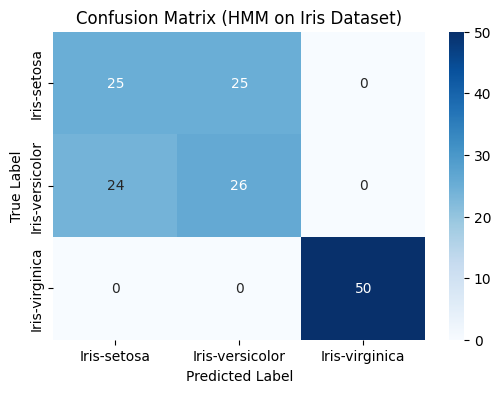

In [21]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, mapped_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.title("Confusion Matrix (HMM on Iris Dataset)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

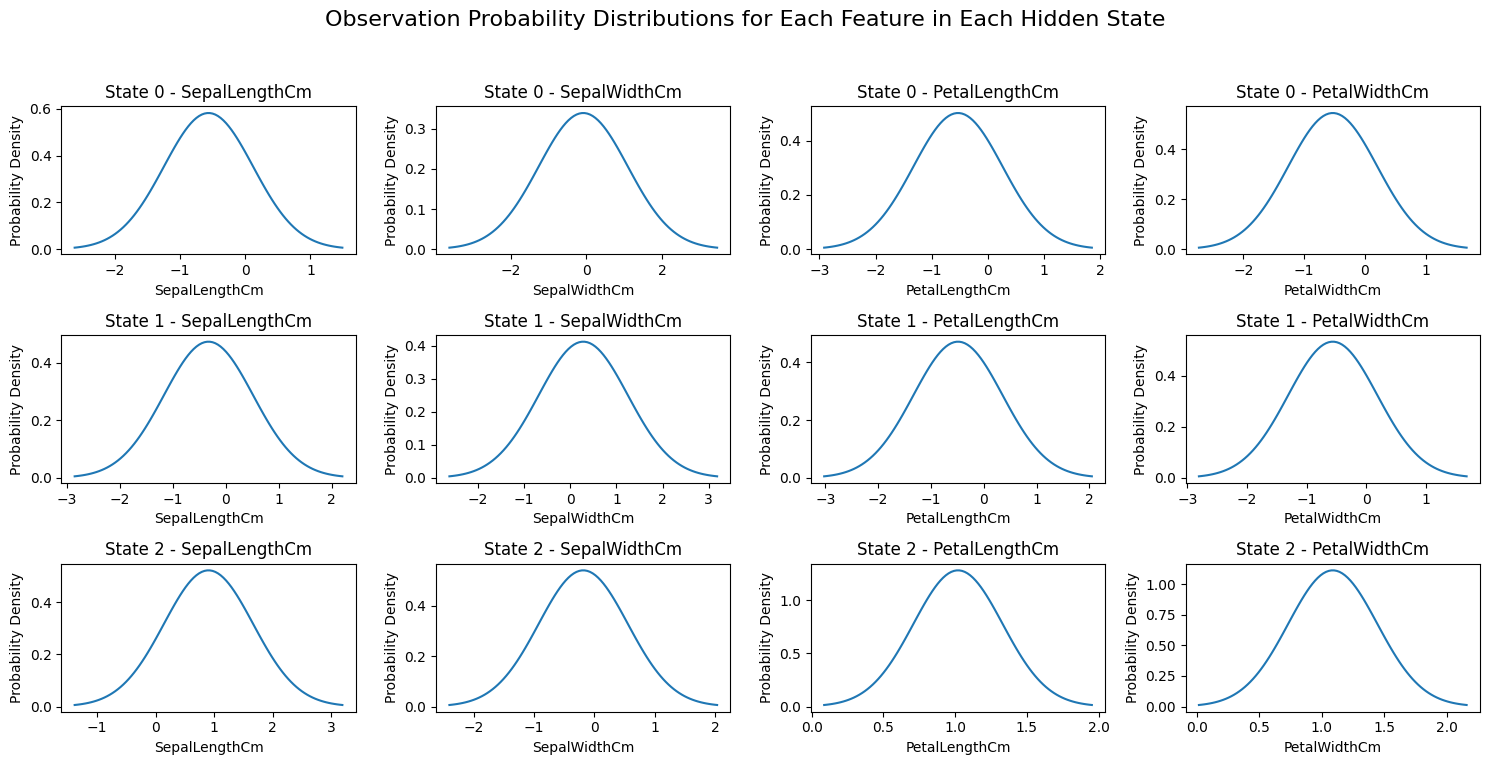

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Number of states and features
n_states = hmm.n_components
n_features = X.shape[1]
feature_names = X.columns

# Plot the Observation Probability Distributions for each feature in each state
fig, axs = plt.subplots(n_states, n_features, figsize=(15, 8))
fig.suptitle(
    "Observation Probability Distributions for Each Feature in Each Hidden State",
    fontsize=16,
)

for state in range(n_states):
    for feature in range(n_features):
        mean = hmm.means_[state, feature]
        variance = hmm.covars_[state, feature, feature]

        # Create a range for the feature based on its mean and variance
        x = np.linspace(mean - 3 * np.sqrt(variance), mean + 3 * np.sqrt(variance), 100)
        y = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(
            -0.5 * ((x - mean) ** 2) / variance
        )

        # Plot the Gaussian distribution for this feature in the current state
        axs[state, feature].plot(x, y, label=f"State {state}")
        axs[state, feature].set_title(f"State {state} - {feature_names[feature]}")
        axs[state, feature].set_xlabel(feature_names[feature])
        axs[state, feature].set_ylabel("Probability Density")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()